# Setup and Config

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import anndata as ad
import PyPDF2
import matplotlib.pyplot as plt
import statistics

#TMS Adata Files
adata_processed = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_processed.h5ad"
adata = sc.read_h5ad(adata_processed)

'''Once you have saved processed thymus subset, unhash code below and hash cell beneath'''
     #adata_tissue = "/mnt/ibm_sm/home/lea.mcgeever/ms/notebooks/adata_files/adata_thymus_processed.h5ad"
     #tissue = sc.read_h5ad(adata_tissue)

sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
#pd.set_option('display.max_rows', None)

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.5


# Clustering

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


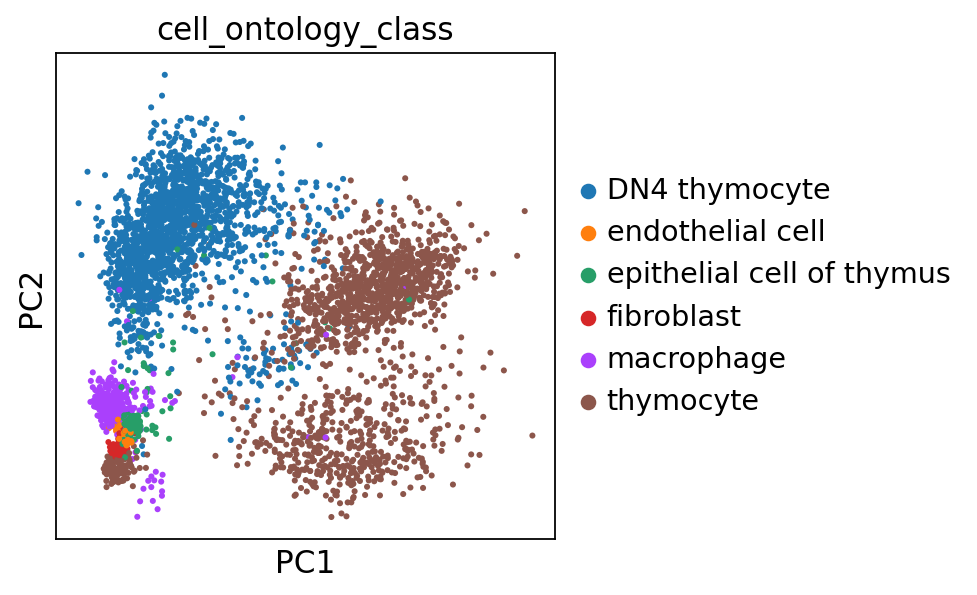

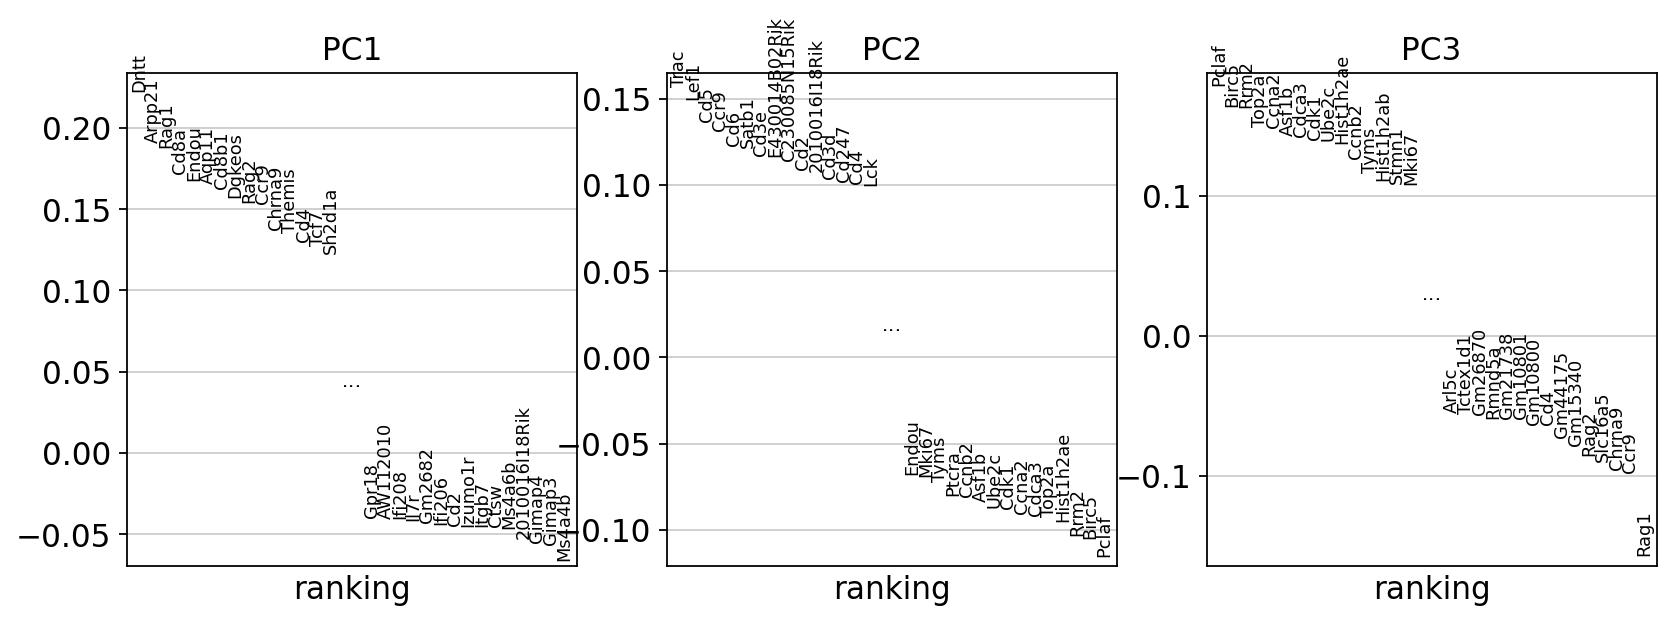

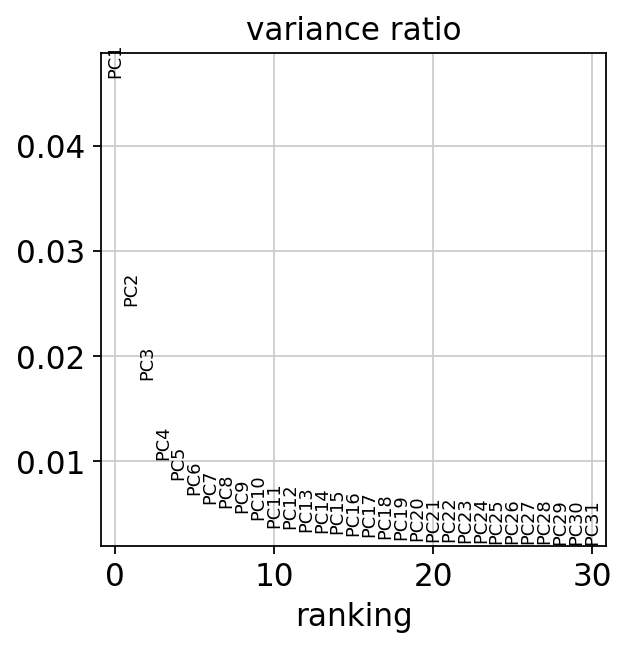

computing neighbors
    using 'X_pca' with n_pcs = 9
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [2]:
adata_thymus = adata[adata.obs['tissue'] == "Thymus"].copy()
sc.pp.pca(adata_thymus)
sc.pl.pca_overview(adata_thymus, color = 'cell_ontology_class')
sc.pp.neighbors(adata_thymus, n_pcs=9)
sc.tl.leiden(adata_thymus)
sc.tl.umap(adata_thymus)


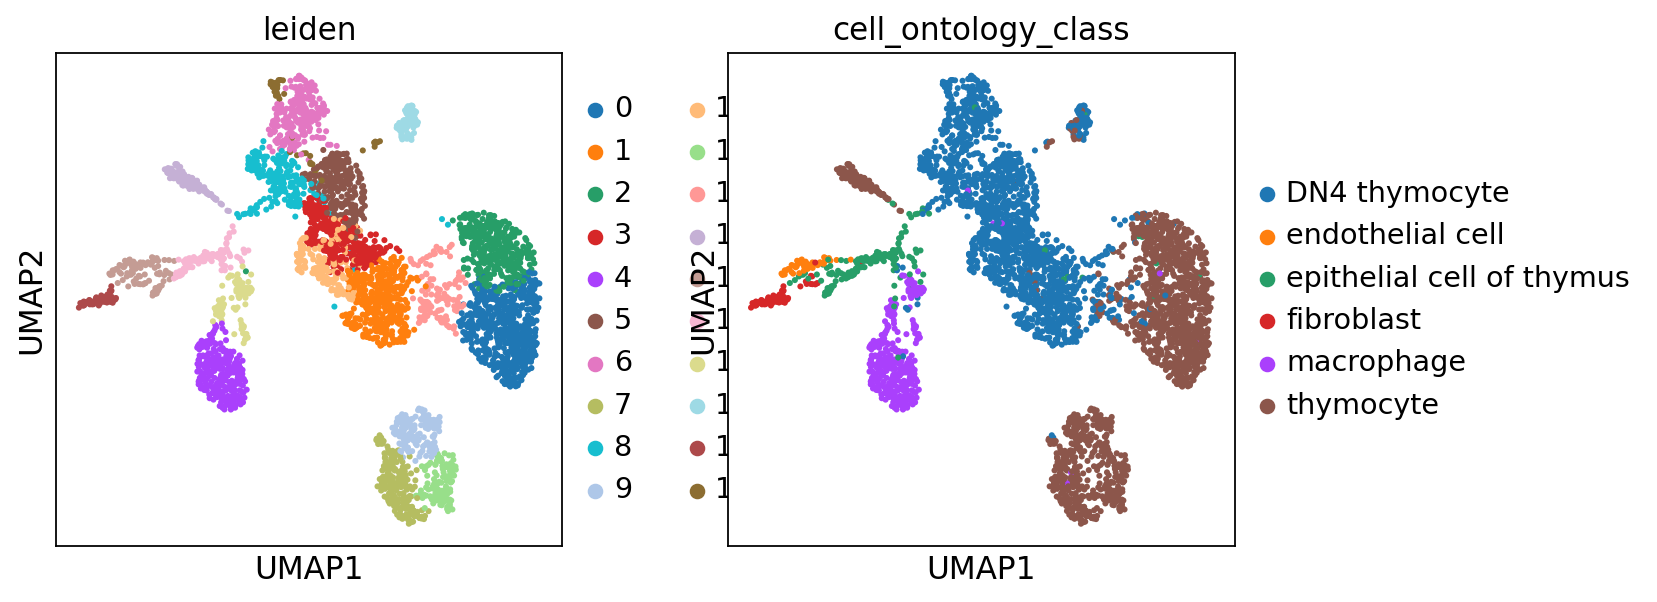

In [3]:
sc.pl.umap(adata_thymus, color = ['leiden', 'cell_ontology_class'])
#sc.tl.rankgenes() look into function, computes marker genes & diff gene expression scanpy

# Comparing thymus cell type percentages

In [ ]:
set(adata_thymus.obs['cell_ontology_class'])

In [ ]:
'''probably don't need this box'''

adata_mac_3m=adata_thymus3[adata_thymus3.obs['cell_ontology_class']=='macrophage'].copy()
adata_thymo_3m=adata_thymus3[adata_thymus3.obs['cell_ontology_class']=='thymocyte'].copy()
adata_DN4_3m=adata_thymus3[adata_thymus3.obs['cell_ontology_class']=='DN4 thymocyte'].copy()

adata_mac_18m=adata_thymus18[adata_thymus18.obs['cell_ontology_class']=='macrophage'].copy()
adata_thymo_18m=adata_thymus18[adata_thymus18.obs['cell_ontology_class']=='thymocyte'].copy()
adata_DN4_18m=adata_thymus18[adata_thymus18.obs['cell_ontology_class']=='DN4 thymocyte'].copy()

adata_mac_24m=adata_thymus24[adata_thymus24.obs['cell_ontology_class']=='macrophage'].copy()
adata_thymo_24m=adata_thymus24[adata_thymus24.obs['cell_ontology_class']=='thymocyte'].copy()
adata_DN4_24m=adata_thymus24[adata_thymus24.obs['cell_ontology_class']=='DN4 thymocyte'].copy()

**Comparing thymocyte percentage and DN4 thymocyte percentage across age in Thymus**

In [ ]:
mac_to_thymo_3m = adata_mac_3m.n_obs/adata_thymo_3m.n_obs
mac_to_thymo_18m = adata_mac_18m.n_obs/adata_thymo_18m.n_obs
mac_to_thymo_24m = adata_mac_24m.n_obs/adata_thymo_24m.n_obs 

mac_to_DN4_3m = adata_mac_3m.n_obs/adata_DN4_3m.n_obs
mac_to_DN4_18m = adata_mac_18m.n_obs/adata_DN4_18m.n_obs
mac_to_DN4_24m = adata_mac_24m.n_obs/adata_DN4_24m.n_obs

'''DN4 thymocyte to thymus tissue'''

adata_DN4_3m.n_obs/adata_thymus3.n_obs,adata_DN4_18m.n_obs/adata_thymus18.n_obs,adata_DN4_24m.n_obs/adata_thymus24.n_obs

#'''Thymocyte to thymus tissue Percentage of thymocytes across age'''
adata_thymo_3m.n_obs/adata_thymus.n_obs,adata_thymo_18m.n_obs/adata_thymus.n_obs,adata_thymo_24m.n_obs/adata_thymus.n_obs


In [ ]:
'''Percentage of macrophage to thymocyte''' 
((mac_to_thymo_3m*100),(mac_to_thymo_18m*100),(mac_to_thymo_24m*100)) 

In [ ]:
'''Percentage of macrphages to DN4 thymocytes'''

((mac_to_DN4_3m*100),(mac_to_DN4_18m*100),(mac_to_DN4_24m*100)) 

In [ ]:
'''DN4 Thymocyte'''
#DN4 thymocyte to thymus tissue Percentage of DN4 thymocytes remain similar with age
adata_DN4_3m.n_obs/adata_thymus3.n_obs,adata_DN4_18m.n_obs/adata_thymus18.n_obs,adata_DN4_24m.n_obs/adata_thymus24.n_obs

#adata_DN4_3m.n_obs, adata_DN4_18m.n_obs, adata_DN4_24m.n_obs

In [ ]:
'''Thymus Tissue 3m, 18m, 24m'''
sc.pl.umap(adata_thymus[adata_thymus.obs['age'] == "3m"], color= 'cell_ontology_class', use_raw=False, cmap = "Oranges"),sc.pl.umap(adata_thymus18, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges"),sc.pl.umap(adata_thymus24, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges")


# By mouse

In [ ]:
#just to show the two macrophage populations aren't simply M & F
#24_60_M Mouse
'''24_60_M Thymus'''
adata_24_60_M = adata[adata.obs['mouse.id']=='24_60_M']
adata_24_60_M_thymus = adata_24_60_M[adata_24_60_M.obs['tissue']=='Thymus']
sc.pl.umap(adata_24_60_M_thymus, color= 'leiden', use_raw=False, cmap = "Oranges")

In [ ]:
'''Tissue by mouse'''


def tissue_by_mouse(adata):
    ''' Input is adata object. Output is a pandas DataFrame 
    of tissue, cell types by mouse'''
    
    mice = ['3_10_M',
             '3_10_M/3_11_M',
             '3_11_M',
             '3_38_F',
             '3_38_F/3_39_F',
             '3_39_F',
             '3_56_F',
             '3_57_F',
             '3_8_M',
             '3_9_M'
             '18_45_M',
             '18_46_F',
             '18_47_F',
             '18_53_M',
             '21_48_F',
             '21_54_F',
             '21_55_F',
             '24_58_M',
             '24_59_M',
             '24_60_M',
             '24_61_M',]
    
    mouse_ID = []
    thymus = []
    macro = []
    thymo = []
    DN4   = []
    #birthday = []
    
    for i,m in enumerate(mice):
 
        mouse = adata[adata.obs['mouse.id']== m]
        thymus_tissue = mouse[mouse.obs['tissue']== 'Thymus']
        macrophage = thymus_tissue[thymus_tissue.obs['cell_ontology_class']== 'macrophage']
        thymocyte = thymus_tissue[thymus_tissue.obs['cell_ontology_class']== 'thymocyte']
        DN4_thymocyte = thymus_tissue[thymus_tissue.obs['cell_ontology_class']== 'DN4 thymocyte'] 
        
        
        mouse_ID.append(m)
        thymus.append(thymus_tissue.n_obs)
        macro.append(macrophage.n_obs)
        thymo.append(thymocyte.n_obs)
        DN4.append(DN4_thymocyte.n_obs)
        #birthday.append()

        
    
    dict_by_mouse = {'Mouse':mouse_ID,
                     #'Age':birthday,
                     'Thymus cells':thymus,
                     'Macrophages': macro,
                     'Thymocytes': thymo,
                     'DN4 Thymocyte': DN4
                                }
    df = pd.DataFrame(dict_by_mouse)
    
    macro_values = df['Macrophages'] / df['Thymus cells']
    thymo_values = df['Thymocytes'] / df['Thymus cells']
    DN4_values = df['DN4 Thymocyte'] / df['Thymus cells']

    df['Macro %'] = macro_values.where(df['Thymus cells'] > 0, other=0)
    df['Thymo %'] = thymo_values.where(df['Thymus cells'] > 0, other=0)
    df['DN4 %'] = DN4_values.where(df['Thymus cells'] > 0, other=0)
    
    return df

In [ ]:
df = tissue_by_mouse(adata)
df

In [ ]:
'''Thymocyte %'''
sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
#set_title("MT Expression Across Tissue & Age")
sns.barplot(y="Thymo %",x="Mouse",data=df)# hue = "Age")

In [ ]:
'''Macrophage %'''
sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
#set_title("MT Expression Across Tissue & Age")
sns.barplot(y="Macro %",x="Mouse",data=df)# hue = "Age")

In [ ]:
'''DN4 Thymocyte %'''
sns.set_style('whitegrid')
fig = plt.figure(figsize=(17, 5))
plt.xticks(rotation=90)
sns.set(font_scale =1)
#set_title("MT Expression Across Tissue & Age")
sns.barplot(y="DN4 %",x="Mouse",data=df)# hue = "Age")

In [ ]:
'''24_60_M Thymus'''
adata_24_60_M = adata[adata.obs['mouse.id']=='24_60_M']
adata_24_60_M_thymus = adata_24_60_M[adata_24_60_M.obs['tissue']=='Thymus']

In [ ]:
'''24_60_M Thymus macrophages'''
adata_24_60_M_thy_mac = adata_24_60_M_thymus[adata_24_60_M_thymus.obs['cell_ontology_class']=='macrophage']
adata_24_60_M_thy_mac.n_obs

In [ ]:
'''24_60_M Thymus DN4 thymocyte'''
adata_24_60_M_DN4 = adata_24_60_M_thymus[adata_24_60_M_thymus.obs['cell_ontology_class']== 'DN4 thymocyte']
adata_24_60_M_DN4.n_obs

In [ ]:
'''24_60_M Thymus thymocyte'''
adata_24_60_M_thymocyte = adata_24_60_M_thymus[adata_24_60_M_thymus.obs['cell_ontology_class']=='thymocyte']
adata_24_60_M_thymocyte.n_obs

In [ ]:
'''Trachea Tissue 3m, 18m, 24m'''

adata_trachea = adata[adata.obs['tissue'] == "Trachea"]
adata_trachea3 = adata_trachea[adata_trachea.obs['age'] == "3m"]
adata_trachea18 = adata_trachea[adata_trachea.obs['age'] == "18m"]
adata_trachea24 =  adata_trachea[adata_trachea.obs['age'] == "24m"]
#Also two macrophage populations

#sc.pl.umap(adata_trachea3, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges"),sc.pl.umap(adata_trachea18, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges"),sc.pl.umap(adata_trachea24, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges")

In [ ]:
'''MAT Tissue 3m, 18m, 24m'''
#Don't see two distinct macrophage populations like Trachea and Thymus
adata_MAT = adata[adata.obs['tissue'] == "MAT"]
adata_MAT3 = adata_MAT[adata_MAT.obs['age'] == "3m"]
adata_MAT18 = adata_MAT[adata_MAT.obs['age'] == "18m"]
adata_MAT24 =  adata_MAT[adata_MAT.obs['age'] == "24m"]


#sc.pl.umap(adata_MAT3, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges"),sc.pl.umap(adata_MAT18, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges"),sc.pl.umap(adata_MAT24, color= 'cell_ontology_class', use_raw=False, cmap = "Oranges")